<a href="https://colab.research.google.com/github/angelamejia804/TimeSeries/blob/main/Forecast_Recepcion_Winter_Grandien_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", ConvergenceWarning)
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score as r2_score

df = pd.read_csv('data_reception.csv')

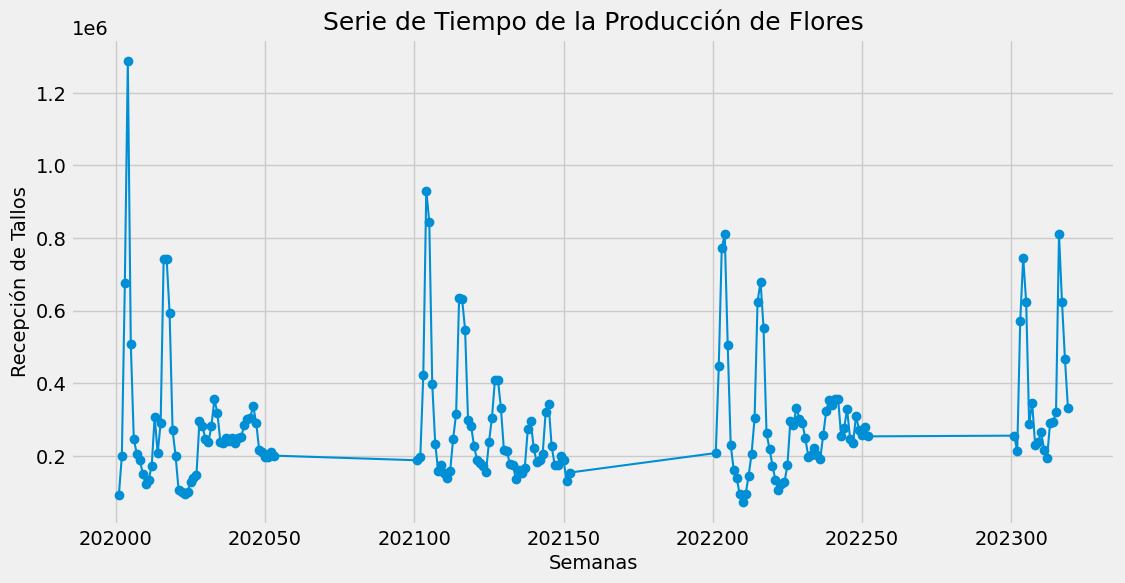

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df["YYYYWWMarketing"],df["Reception Flower Stems"], "-o")

plt.xlabel("Semanas", fontsize=14)
plt.ylabel("Recepción de Tallos", fontsize=14)
plt.title("Serie de Tiempo de la Producción de Flores", fontsize=18)
plt.show()

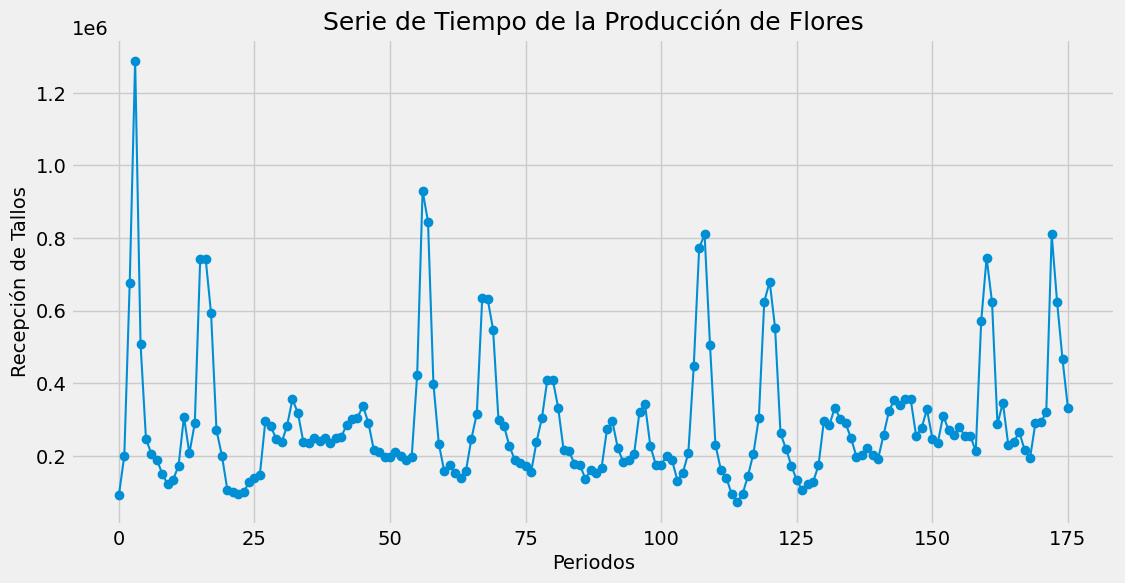

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df["Reception Flower Stems"], "-o")

plt.xlabel("Periodos", fontsize=14)
plt.ylabel("Recepción de Tallos", fontsize=14)
plt.title("Serie de Tiempo de la Producción de Flores", fontsize=18)
plt.show()

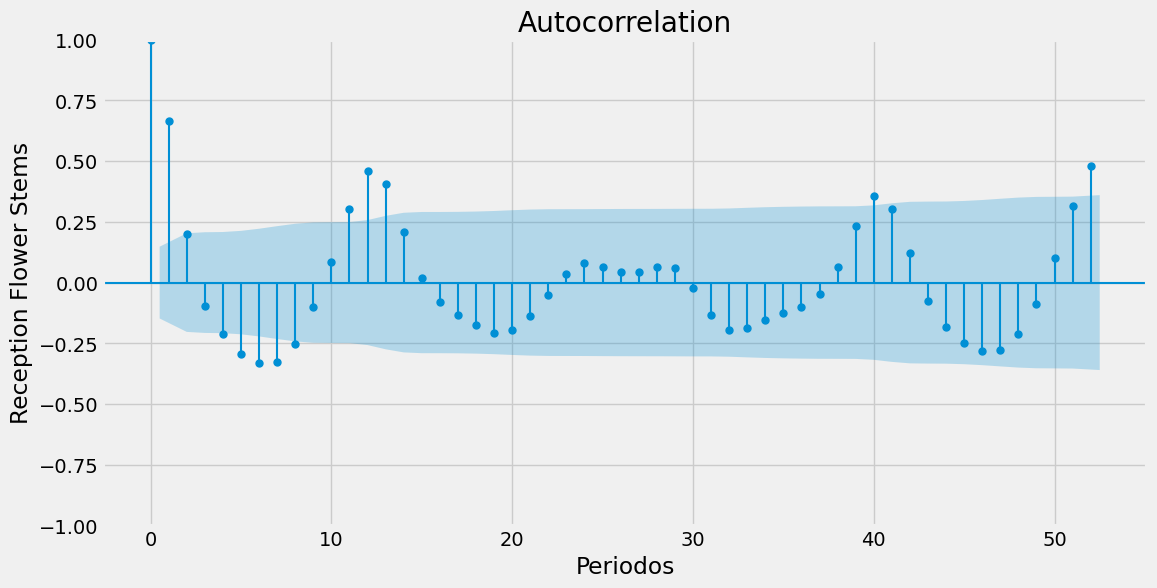

In [ ]:
# Grafica de AutoCorrelación

from statsmodels.graphics.tsaplots import plot_acf
plt.rc("figure", figsize=(12,6))
plot_acf(df["Reception Flower Stems"].values, fft=1, lags=52)

plt.xlabel("Periodos")
plt.ylabel("Reception Flower Stems")

plt.show()

En esta gráfica podemos evidenciar que la serie de datos presenta un patrón repetitivo a traves de todos los periodos, siendo una constante de 52 periodos donde se presenta la estacionalidad de los datos.

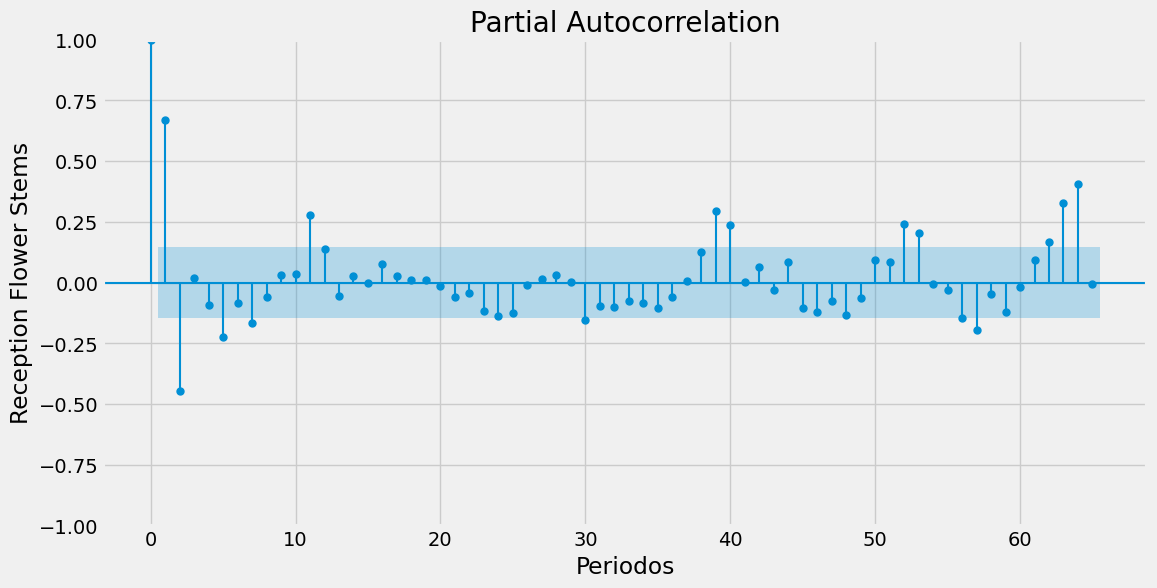

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rc("figure", figsize=(12,6))
plot_pacf(df["Reception Flower Stems"].values,  lags=65)

plt.xlabel("Periodos")
plt.ylabel("Reception Flower Stems")

plt.show()

## METODO HOLT-WINTER - Suavisazión Exponencial Triple

In [ ]:
# Se realiza la partición de datos con las semanas de 202001 hasta 202252 como datos de entrenamiento y las semanas de 2023 cmo datos de test.

datos_train = df.loc [:156,:] 
datos_test = df.loc[157:,:]

In [ ]:
# Aplicación del Modelo sin parámetros
mod_w = ExponentialSmoothing(datos_train["Reception Flower Stems"]).fit()
df["Winter"] = mod_w.fittedvalues
pred_w = mod_w.forecast(19)
expo_w = pd.concat([df["Winter"],pred_w])

In [ ]:
mod_w.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995,True
initial_level,l.0,568447.200,True


In [ ]:
print("MSE Holt-Winter: ", MSE(datos_test["Reception Flower Stems"],pred_w))
print("MAE Holt-Winter: ", MAE(datos_test["Reception Flower Stems"],pred_w))
print("MAPE Holt-Winter: ", MAPE(datos_test["Reception Flower Stems"],pred_w))
print("r2_score Holt-Winter: ", r2_score(datos_test["Reception Flower Stems"],pred_w))

MSE Holt-Winter:  52570205829.336235
MAE Holt-Winter:  150126.148280606
MAPE Holt-Winter:  0.29070110591104337
r2_score Holt-Winter:  -0.4868513484485628


In [ ]:
n_features = datos_test.shape[1]-1
n = len(datos_test["Reception Flower Stems"])
r2=r2_score(datos_test["Reception Flower Stems"],pred_w)
adj_r2 = 1 - (1 - r2) * (len(datos_test) - 1) / (len(datos_test) - 1 - 1)
print("Ajusted_r2 Holt-Winter: ", adj_r2)

Ajusted_r2 Holt-Winter:  -0.5743131924749487


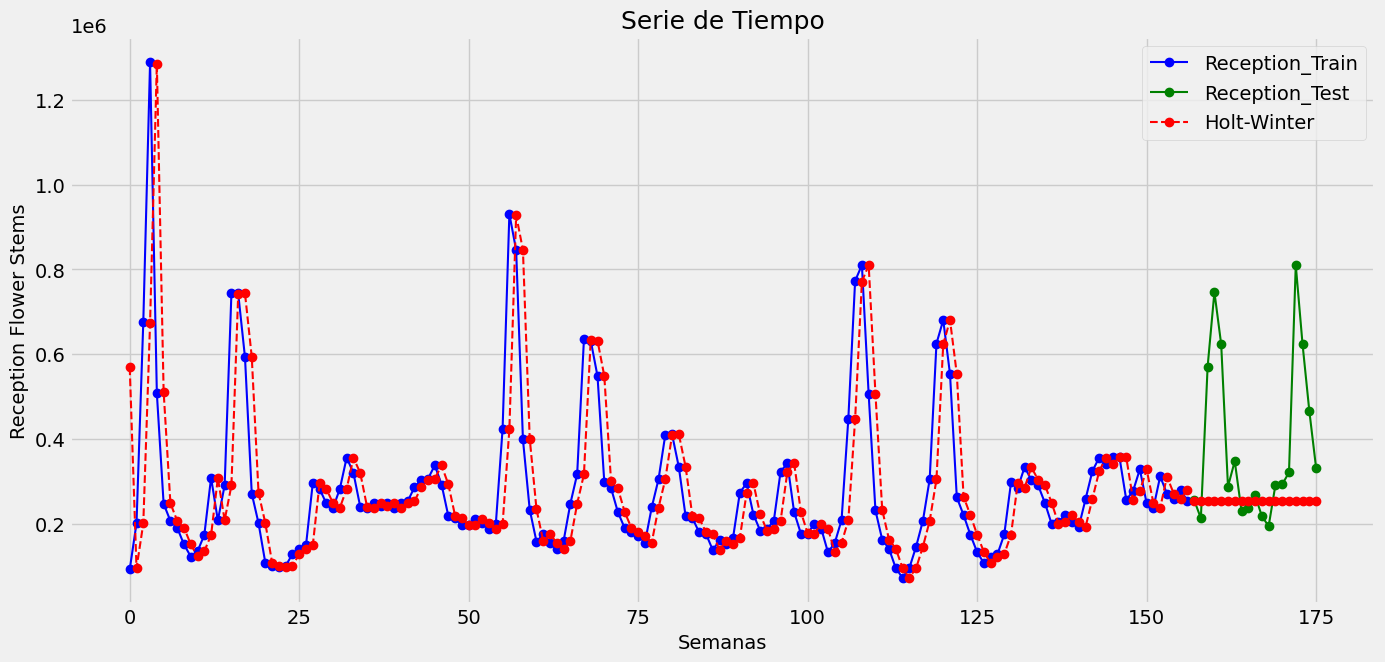

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(datos_train.index,datos_train["Reception Flower Stems"], "-o", color="blue", label="Reception_Train")
plt.plot(datos_test.index,datos_test["Reception Flower Stems"], "-o", color="green", label="Reception_Test")
plt.plot(expo_w, "--o", color="red", label="Holt-Winter")

plt.xlabel("Semanas", fontsize=14)
plt.ylabel("Reception Flower Stems", fontsize=14)
plt.title("Serie de Tiempo", fontsize=18)
plt.legend(loc="best")
plt.show()

MAPE Holt-Winter:  0.26323773653793714
r2_score Holt-Winter:  0.6144849182141056
Ajusted_r2 Holt-Winter:  0.5918075604619941


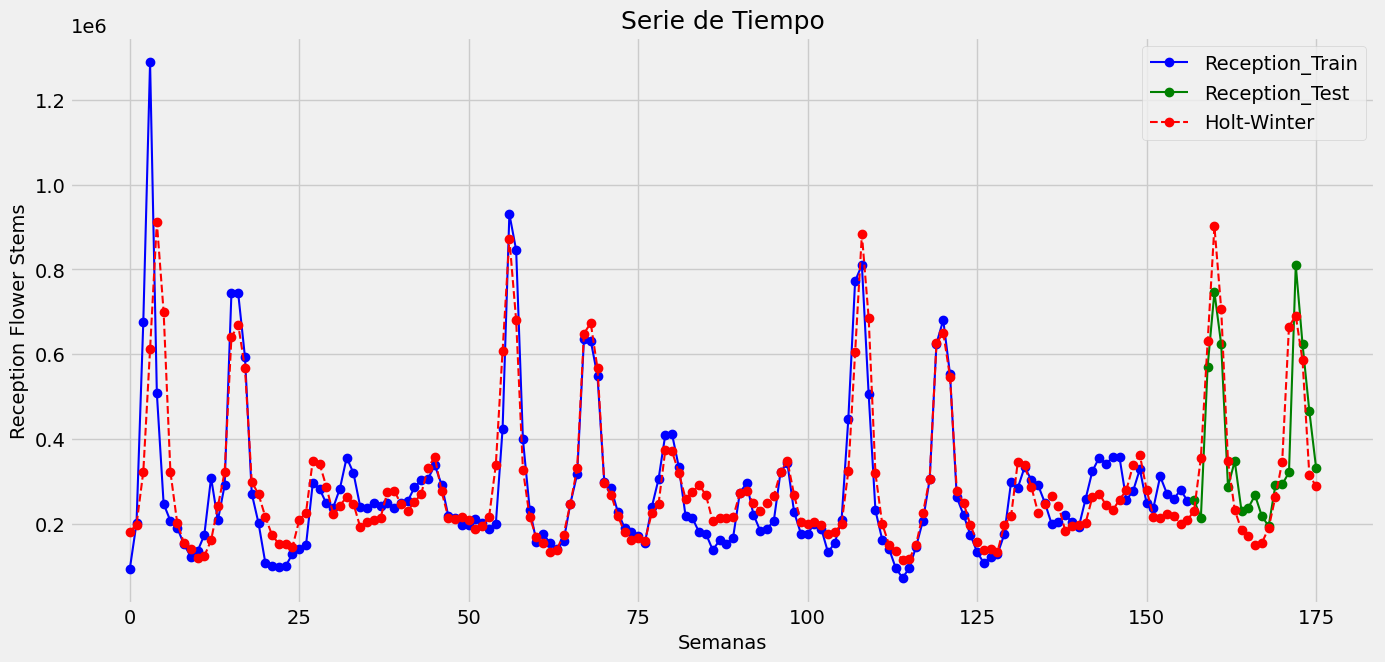

In [ ]:
# Aplicación de Modelo con la definición de parámetros Con optimización
mod_w = ExponentialSmoothing(
    datos_train["Reception Flower Stems"],seasonal_periods=52,
    trend="add",seasonal="add").fit(optimized=True)

datos_train["Winter"] = mod_w.fittedvalues
pred_w = mod_w.forecast(19)
expo_w = pd.concat([datos_train["Winter"],pred_w])
print("MAPE Holt-Winter: ", MAPE(datos_test["Reception Flower Stems"],pred_w))
print("r2_score Holt-Winter: ", r2_score(datos_test["Reception Flower Stems"],pred_w))
n_features = datos_test.shape[1]-1
n = len(datos_test["Reception Flower Stems"])
r2=r2_score(datos_test["Reception Flower Stems"],pred_w)
adj_r2 = 1 - (1 - r2) * (len(datos_test) - 1) / (len(datos_test) - 1 - 1)
print("Ajusted_r2 Holt-Winter: ", adj_r2)

plt.figure(figsize=(15,7))
plt.plot(datos_train.index,datos_train["Reception Flower Stems"], "-o", color="blue", label="Reception_Train")
plt.plot(datos_test.index,datos_test["Reception Flower Stems"], "-o", color="green", label="Reception_Test")
plt.plot(expo_w, "--o", color="red", label="Holt-Winter")

plt.xlabel("Semanas", fontsize=14)
plt.ylabel("Reception Flower Stems", fontsize=14)
plt.title("Serie de Tiempo", fontsize=18)
plt.legend(loc="best")
plt.show()

datos_plot=pd.DataFrame({"Reception_Train":datos_train["Reception Flower Stems"],"prediction":expo_w,"Reception_Test":datos_test["Reception Flower Stems"],})
datos_plot.index.name="YYYYWWMarketing"

fig=px.line(
    data_frame=datos_plot.reset_index(),
    x="YYYYWWMarketing",
    y=datos_plot.columns,
    title="Week Reception",
    width=1500,
    height=600
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
mod_w.params_formatted

,name,param,optimized
smoothing_level,alpha,0.040357,True
smoothing_trend,beta,0.000100,True
smoothing_seasonal,gamma,0.000100,True
initial_level,l.0,276402.916026,True
initial_trend,b.0,293.550583,True
initial_seasons.0,s.0,-95800.727348,True
initial_seasons.1,s.1,-75961.063887,True
initial_seasons.2,s.2,48510.734190,True
initial_seasons.3,s.3,323031.330344,True
initial_seasons.4,s.4,594778.075536,True


**Aplicación del Modelo Holt_Winter sin incluir el año 2020**

MAPE Holt-Winter:  0.31369509058685796
r2_score Holt-Winter:  0.3490055045186613
Ajusted_r2 Holt-Winter:  0.3107117106668179


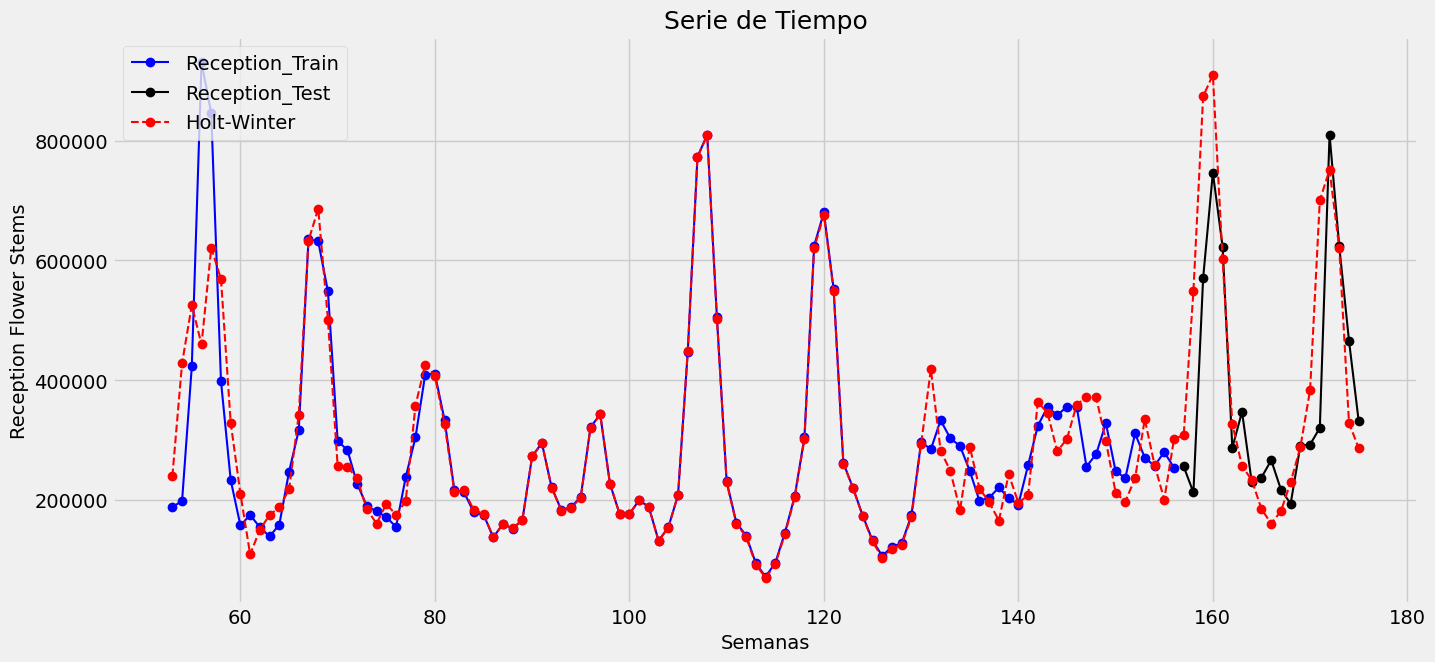

In [ ]:
datos_train = df.loc [53:156,:] 
datos_test = df.loc[157:,:]

# Aplicación de Modelo con la definición de parámetros Con optimización
mod_w = ExponentialSmoothing(
    datos_train["Reception Flower Stems"],seasonal_periods=52,
    trend="add",seasonal="add").fit(optimized=True)

datos_train["Winter"] = mod_w.fittedvalues
pred_w = mod_w.forecast(19)
expo_w = pd.concat([datos_train["Winter"],pred_w])
print("MAPE Holt-Winter: ", MAPE(datos_test["Reception Flower Stems"],pred_w))
print("r2_score Holt-Winter: ", r2_score(datos_test["Reception Flower Stems"],pred_w))
n_features = datos_test.shape[1]-1
n = len(datos_test["Reception Flower Stems"])
r2=r2_score(datos_test["Reception Flower Stems"],pred_w)
adj_r2 = 1 - (1 - r2) * (len(datos_test) - 1) / (len(datos_test) - 1 - 1)
print("Ajusted_r2 Holt-Winter: ", adj_r2)

plt.figure(figsize=(15,7))
plt.plot(datos_train.index,datos_train["Reception Flower Stems"], "-o", color="blue", label="Reception_Train")
plt.plot(datos_test.index,datos_test["Reception Flower Stems"], "-o", color="black", label="Reception_Test")
plt.plot(expo_w, "--o", color="red", label="Holt-Winter")

plt.xlabel("Semanas", fontsize=14)
plt.ylabel("Reception Flower Stems", fontsize=14)
plt.title("Serie de Tiempo", fontsize=18)
plt.legend(loc="best")
plt.show()

datos_plot=pd.DataFrame({"Reception_Train":datos_train["Reception Flower Stems"],"prediction":expo_w,"Reception_Test":datos_test["Reception Flower Stems"],})
datos_plot.index.name="YYYYWWMarketing"

fig=px.line(
    data_frame=datos_plot.reset_index(),
    x="YYYYWWMarketing",
    y=datos_plot.columns,
    title="Week Reception",
    width=1500,
    height=600
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

**Aplicación del modelo con la totalidad de los datos**

MAPE Holt-Winter:  0.2094167553575076
r2_score Holt-Winter:  0.7041901689894507
Ajusted_r2 Holt-Winter:  0.7024901124893901


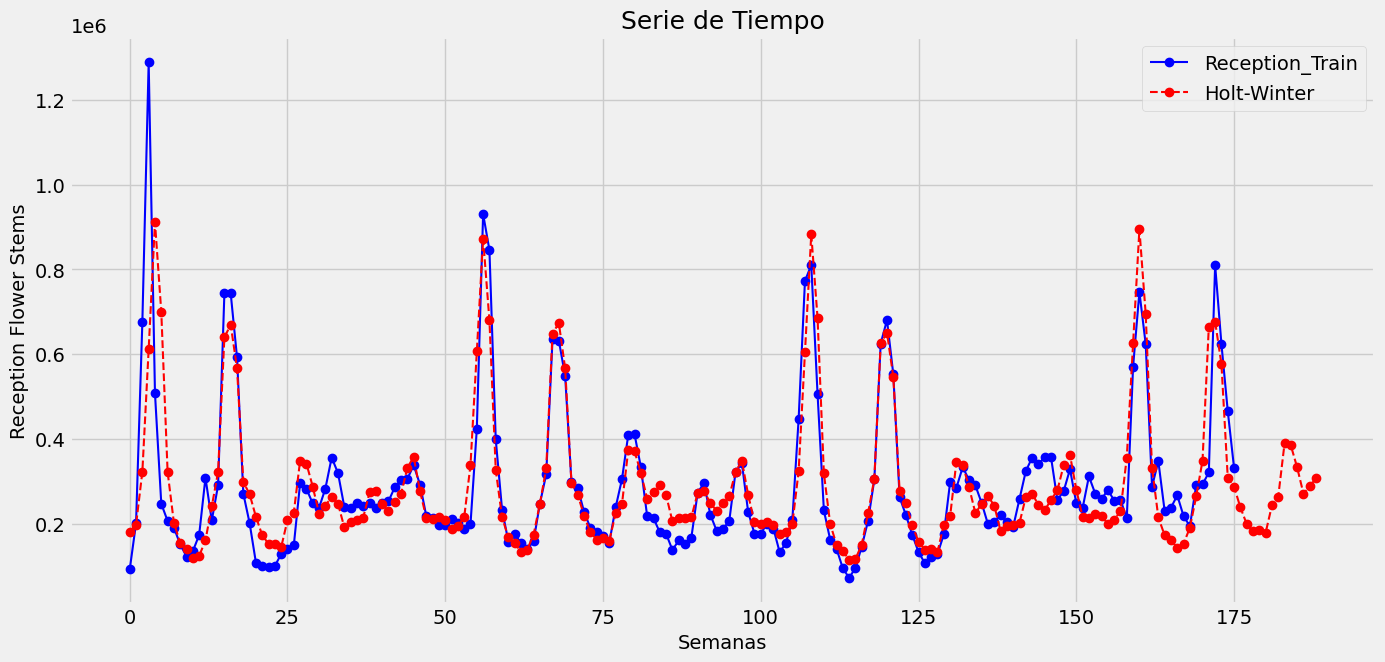

In [ ]:
# Aplicación de Modelo con la definición de parámetros Con optimización
mod_w = ExponentialSmoothing(
    df["Reception Flower Stems"],seasonal_periods=52,
    trend="add",seasonal="add").fit(optimized=True)

df["Winter"] = mod_w.fittedvalues
pred_w = mod_w.forecast(13)
expo_w = pd.concat([df["Winter"],pred_w])
print("MAPE Holt-Winter: ", MAPE(df["Reception Flower Stems"],df["Winter"]))
print("r2_score Holt-Winter: ", r2_score(df["Reception Flower Stems"],df["Winter"]))
n_features = df.shape[1]-1
n = len(df["Reception Flower Stems"])
r2=r2_score(df["Reception Flower Stems"],df["Winter"])
adj_r2 = 1 - (1 - r2) * (len(df) - 1) / (len(df) - 1 - 1)
print("Ajusted_r2 Holt-Winter: ", adj_r2)

plt.figure(figsize=(15,7))
plt.plot(df.index,df["Reception Flower Stems"], "-o", color="blue", label="Reception_Train")
plt.plot(expo_w, "--o", color="red", label="Holt-Winter")

plt.xlabel("Semanas", fontsize=14)
plt.ylabel("Reception Flower Stems", fontsize=14)
plt.title("Serie de Tiempo", fontsize=18)
plt.legend(loc="best")
plt.show()

datos_plot=pd.DataFrame({"Reception":df["Reception Flower Stems"],"prediction":expo_w,})
datos_plot.index.name="YYYYWWMarketing"

fig=px.line(
    data_frame=datos_plot.reset_index(),
    x="YYYYWWMarketing",
    y=datos_plot.columns,
    title="Week Reception",
    width=1500,
    height=600
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

## GRADIENT BOOSTING - Forecasting

Método utilizado: Gradient Boosting Decision Tree

In [ ]:
#pip install --upgrade pip
#pip install skforecast
#pip install lightgbm

In [ ]:
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use("fivethirtyeight")
plt.rcParams["lines.linewidth"]=1.5
%matplotlib inline

In [ ]:
# Librerias para el Modelado y el ForeCasting
from lightgbm import LGBMRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [ ]:
df = pd.read_csv('data_reception.csv')

In [ ]:
datos_train = df.loc [:119,:] # 75% de los Datos
datos_validation = df.loc[120:156,:] # 11.5% de los Datos
datos_test = df.loc[157:,:] # 13,5% de los Datos

In [ ]:
df.loc[:119,"partition"] = "train"
df.loc[120:156,"partition"] = "validation"
df.loc[157:,"partition"] = "test"

fig = px.line(
    data_frame=df.reset_index(),
    x="YYYYWWMarketing",
    y="Reception Flower Stems",
    color= "partition",
    title="Week Reception",
    width=1200,
    height=500
)

fig.show()
df=df.drop(columns="partition")

In [ ]:
df.loc[:119,"partition"] = "train"
df.loc[120:156,"partition"] = "validation"
df.loc[157:,"partition"] = "test"

fig = px.line(
    data_frame=df.reset_index(),
    x=df.index,
    y="Reception Flower Stems",
    color= "partition",
    title="Week Reception",
    width=1200,
    height=500
)

fig.show()
df=df.drop(columns="partition")

In [ ]:
forecaster = ForecasterAutoreg(
    regressor=LGBMRegressor(),
    lags=52
)
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 
Transformer for y: None 
Transformer for exog: None 
Window size: 52 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 
Creation date: 2023-05-18 19:46:25 
Last fit date: No

In [ ]:
forecaster.fit(y=df.loc[:156,"Reception Flower Stems"])
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 
Transformer for y: None 
Transformer for exog: None 
Window size: 52 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 156] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 
Creation date: 2023-05-18 19:46:25 
Last fit d

In [ ]:
prediction_LGBM = forecaster.predict(steps=19)
prediction_LGBM

157    309709.628249
158    389650.871354
159    544810.354927
160    603638.829761
161    538897.073542
162    379826.842003
163    432464.654095
164    348446.035291
165    283316.919163
166    184460.393960
167    151354.924545
168    229549.583284
169    312378.254889
170    472439.876534
171    569034.192211
172    606893.558446
173    577376.170681
174    526949.482291
175    499679.294253
Name: pred, dtype: float64

In [ ]:
datos_plot=pd.DataFrame({"test":datos_test["Reception Flower Stems"],"prediction":prediction_LGBM,})
datos_plot.index.name="YYYYWWMarketing"

print("MAPE Gradiant Boosting: ", MAPE(datos_test["Reception Flower Stems"],prediction_LGBM))
print("r2_score Gradiant Boosting: ", r2_score(datos_test["Reception Flower Stems"],prediction_LGBM))
n_features = datos_test.shape[1]-1
n = len(datos_test["Reception Flower Stems"])
r2=r2_score(datos_test["Reception Flower Stems"],prediction_LGBM)
adj_r2 = 1 - (1 - r2) * (len(datos_test) - 1) / (len(datos_test) - 1 - 1)
print("Ajusted_r2 Gradiant Boosting: ", adj_r2)

fig=px.line(
    data_frame=datos_plot.reset_index(),
    x="YYYYWWMarketing",
    y=datos_plot.columns,
    title="Week Reception",
    width=1200,
    height=500
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

MAPE Gradiant Boosting:  0.31106264253632565
r2_score Gradiant Boosting:  0.5882210484139934
Ajusted_r2 Gradiant Boosting:  0.5639987571442283


**Backtesting**

Evalua el comportamiento como si se hubiese entrenado el modelo desde el comienzo de los datos

In [ ]:
# Backtesting

metrica, prediction_LGBM = backtesting_forecaster(
    forecaster=forecaster,
    y=df["Reception Flower Stems"],
    initial_train_size=len(df.loc[:156]),
    steps=16,
    metric = "mean_absolute_percentage_error",
    refit=False,
    verbose=True
)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 157
Number of observations used for backtesting: 19
    Number of folds: 2
    Number of steps per fold: 16
    Last fold only includes 3 observations.

Data partition in fold: 0
    Training:   0 -- 156  (n=157)
    Validation: 157 -- 172  (n=16)
Data partition in fold: 1
    Training:   0 -- 156  (n=157)
    Validation: 173 -- 175  (n=3)



In [ ]:
print(f"Backtest error: MAPE Gradient Boosting {metrica}")
r2=r2_score(datos_test["Reception Flower Stems"], prediction_LGBM)
print("r2_score Gradient Boosting: ", r2)
n_features = datos_test.shape[1]-1
n = len(datos_test) 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1) 
print("Ajusted_r2 Gradient Boosting: ", adj_r2)

Backtest error: MAPE Gradient Boosting 0.2980551834024783
r2_score Gradient Boosting:  0.6147598979344685
Ajusted_r2 Gradient Boosting:  0.5920987154600255


In [ ]:
datos_plot=pd.DataFrame({"test":datos_test["Reception Flower Stems"],"prediction":prediction_LGBM["pred"],})
datos_plot.index.name="YYYYWWMarketing"

fig=px.line(
    data_frame=datos_plot.reset_index(),
    x="YYYYWWMarketing",
    y=datos_plot.columns,
    title="Week Reception",
    width=1200,
    height=500
)

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# Intervalos de predicción

metrica, prediction_LGBM = backtesting_forecaster(
    forecaster=forecaster,
    y=df["Reception Flower Stems"],
    initial_train_size=len(df.loc[:156]),
    steps=16,
    interval= [2.5,97.5], #Intervalo del 95%
    n_boot= 5000,
    metric = "mean_absolute_percentage_error",
    refit=False,
    verbose=True
)

print(f"Backtest error: MAPE Gradient Boosting {metrica}")
r2=r2_score(datos_test["Reception Flower Stems"], prediction_LGBM["pred"])
print("r2_score Gradient Boosting: ", r2)
n_features = datos_test.shape[1]-1
n = len(datos_test) 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1) 
print("Ajusted_r2 Gradient Boosting: ", adj_r2)
prediction_LGBM.head(23)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 157
Number of observations used for backtesting: 19
    Number of folds: 2
    Number of steps per fold: 16
    Last fold only includes 3 observations.

Data partition in fold: 0
    Training:   0 -- 156  (n=157)
    Validation: 157 -- 172  (n=16)
Data partition in fold: 1
    Training:   0 -- 156  (n=157)
    Validation: 173 -- 175  (n=3)

Backtest error: MAPE Gradient Boosting 0.2980551834024783
r2_score Gradient Boosting:  0.6147598979344685
Ajusted_r2 Gradient Boosting:  0.5920987154600255


,pred,lower_bound,upper_bound
157,309709.628249,242822.814357,377122.387693
158,389650.871354,285108.925689,480515.121753
159,544810.354927,444302.316692,612223.114370
160,603638.829761,536752.015869,679612.212289
161,538897.073542,484864.786441,631137.897256
162,379826.842003,312940.028110,447239.601446
163,432464.654095,362164.925810,508438.036624
164,348446.035291,281559.221398,424419.417819
165,283316.919163,169809.420878,350729.678607
166,184460.393960,131204.969456,327276.033571


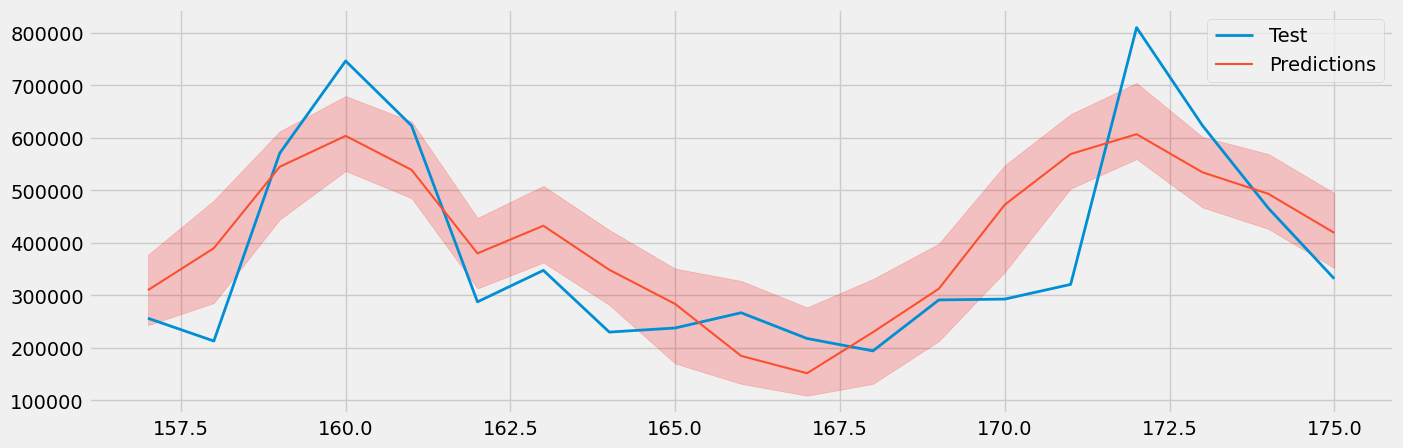

In [ ]:
fig, ax=plt.subplots(figsize=(15,5))
df.loc[prediction_LGBM.index,"Reception Flower Stems"].plot(ax=ax, linewidth=2, label="Test")
prediction_LGBM["pred"].plot(ax=ax, label="Predictions")
ax.fill_between(
    prediction_LGBM.index,
    prediction_LGBM["lower_bound"],
    prediction_LGBM["upper_bound"],
    color="red",
    alpha=0.2
)
ax.legend()

**Ajuste de Hiperparametros**

El objetivo es buscar la mejor combinación de hiperparametros del modelo, resaltando que en este proceso no se utilizan los datos de test con el fin de evitar un sobreajuste del modelo. El entrenamiento se realiza mediante bactesting sin reentrenamiento.

In [ ]:
from skforecast.model_selection  import  grid_search_forecaster

In [ ]:
param_grid = {
    "n_estimators":[10,50,100,500,1000,5000],
    "max_depth":[3, 10, 50],
    "learning_rate":[0.001, 0.01, 0.1]
}

lags_grid=[11, 52]

resultados_grid = grid_search_forecaster(
    forecaster=forecaster,
    y=df.loc[:156,"Reception Flower Stems"],
    param_grid=param_grid,
    lags_grid=lags_grid,
    steps=16,
    refit=True, #Con Reentrenamiento
    metric="mean_absolute_percentage_error",
    initial_train_size=len(datos_train), # Datos de entrenamiento del modelo
    return_best=True,
    verbose=False
)

Number of models compared: 108.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [00:37<00:00, 19.00s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52] 
  Parameters: {'learning_rate': 0.001, 'max_depth': 50, 'n_estimators': 5000}
  Backtesting metric: 0.25113447807598993



In [ ]:
resultados_grid.head(8)

,lags,params,mean_absolute_percentage_error,learning_rate,max_depth,n_estimators
71,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.001, 'max_depth': 50, 'n_e...",0.251134,0.001,50.0,5000.0
65,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.001, 'max_depth': 10, 'n_e...",0.251134,0.001,10.0,5000.0
59,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",0.251134,0.001,3.0,5000.0
75,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.251135,0.010,3.0,500.0
81,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.251135,0.010,10.0,500.0
87,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 50, 'n_es...",0.251135,0.010,50.0,500.0
103,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.259569,0.100,50.0,50.0
91,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.259569,0.100,3.0,50.0


In [ ]:
metrica, prediction_LGBM = backtesting_forecaster(
    forecaster=forecaster,
    y=df["Reception Flower Stems"],
    initial_train_size=len(df.loc[:156]),
    steps=16,
    metric = "mean_absolute_percentage_error",
    refit=False,
    verbose=False
)
print(f"Backtest error: MAPE Gradient Boosting {metrica}")
r2=r2_score(datos_test["Reception Flower Stems"], prediction_LGBM["pred"])
print("r2_score Gradient Boosting: ", r2)
n_features = datos_test.shape[1]-1
n = len(datos_test) 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1) 
print("Ajusted_r2 Gradient Boosting: ", adj_r2)

Backtest error: MAPE Gradient Boosting 0.28160351085029783
r2_score Gradient Boosting:  0.5906641696989788
Ajusted_r2 Gradient Boosting:  0.5665855914459776


In [ ]:
forecaster.get_feature_importance().sort_values("importance", ascending=False)

,feature,importance
0,lag_1,2274
10,lag_11,1539
39,lag_40,1088
9,lag_10,1013
27,lag_28,728
28,lag_29,700
46,lag_47,695
11,lag_12,626
32,lag_33,611
45,lag_46,577


In [ ]:
metrica, prediction_LGBM = backtesting_forecaster(
    forecaster=forecaster,
    y=df["Reception Flower Stems"],
    initial_train_size=len(df.loc[:156]),
    steps=16,
    interval= [2.5,97.5], #Intervalo del 90%
    n_boot= 100,
    metric = "mean_absolute_percentage_error",
    refit=False,
    verbose=True
)

print(f"Backtest error: MAPE Gradient Boosting {metrica}")
r2=r2_score(datos_test["Reception Flower Stems"], prediction_LGBM["pred"])
print("r2_score Gradient Boosting: ", r2)
n_features = datos_test.shape[1]-1
n = len(datos_test) 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1) 
print("Ajusted_r2 Gradient Boosting: ", adj_r2)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 157
Number of observations used for backtesting: 19
    Number of folds: 2
    Number of steps per fold: 16
    Last fold only includes 3 observations.

Data partition in fold: 0
    Training:   0 -- 156  (n=157)
    Validation: 157 -- 172  (n=16)
Data partition in fold: 1
    Training:   0 -- 156  (n=157)
    Validation: 173 -- 175  (n=3)

Backtest error: MAPE Gradient Boosting 0.28160351085029783
r2_score Gradient Boosting:  0.5906641696989788
Ajusted_r2 Gradient Boosting:  0.5665855914459776


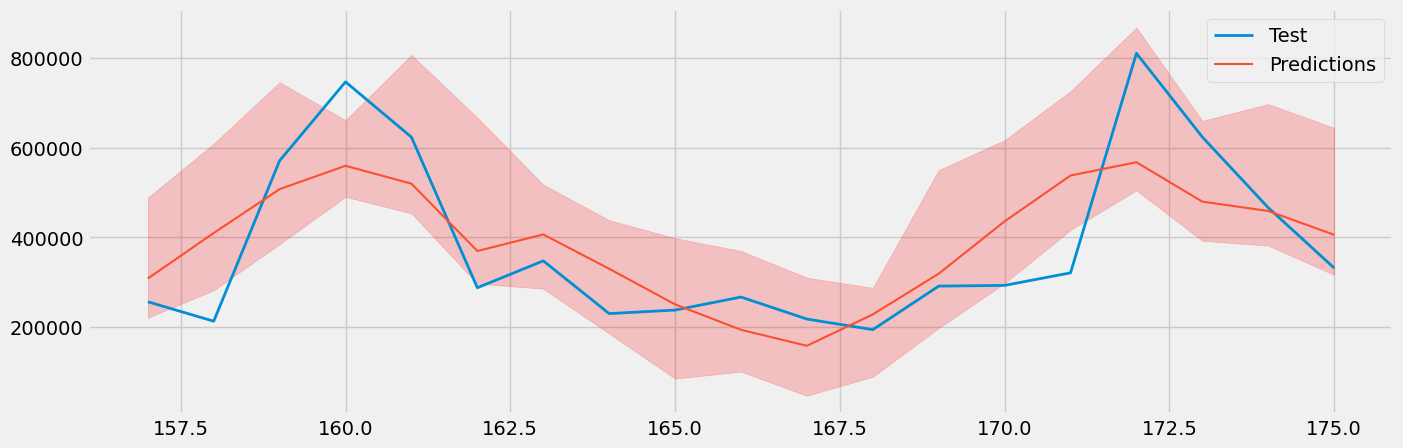

In [ ]:
fig, ax=plt.subplots(figsize=(15,5))
df.loc[prediction_LGBM.index,"Reception Flower Stems"].plot(ax=ax, linewidth=2, label="Test")
prediction_LGBM["pred"].plot(ax=ax, label="Predictions")
ax.fill_between(
    prediction_LGBM.index,
    prediction_LGBM["lower_bound"],
    prediction_LGBM["upper_bound"],
    color="red",
    alpha=0.2
)
ax.legend()

In [ ]:
prediction_LGBM.head(23)

,pred,lower_bound,upper_bound
157,307912.294442,235944.935892,414898.762161
158,409401.975394,290201.252782,558535.189727
159,507232.581954,388258.001868,617879.205325
160,559296.043059,492443.904839,634774.993545
161,519440.914729,478553.928615,724629.629057
162,369267.556003,305366.433380,484648.904084
163,406211.503046,286896.364859,473865.087474
164,329680.015538,214549.172973,426006.663590
165,250326.351425,129850.161387,326526.735549
166,193638.309393,110740.937212,317140.495555
